**Applied Statistics**<br/>
Prof. Dr. Jan Kirenz <br/>
Hochschule der Medien Stuttgart

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency, fisher_exact
from sklearn.model_selection import train_test_split

Name:

Surname:

# Assignment 4: Logistic Regression 

**Data Description:**

The World Happiness Report ranks 156 countries by their happiness levels (`Happiness.Score`). The rankings come from the Gallup World Poll and are based on answers to the main life evaluation question asked in the poll. This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The rankings are from nationally representative samples, for the years 2013-2015. They are based entirely on the survey scores, using the Gallup weights to make the estimates representative. 

The other variables in the dataset show the estimated extent to which each of the factors contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the factors (for more information about the data, visit this [FAQ-site](https://s3.amazonaws.com/happiness-report/2016/FAQ_2016.pdf) or the [World Happiness Report-site](http://worldhappiness.report/ed/2016/)).

**Task Description**

In this assignment, we analyse the relationship between the country specific happiness and some predictor variables. In particular, we want to classify which countries are likely to be "happy". 


* Data preparation:

  - 1.1 Rename the variables in the DataFrame to 'Country', 'Happiness_Score', 'Economy', 'Family', 'Health' and 'Trust'

  - 1.2 Create a new categorical variable called `Happy`, where all countries with a Happiness_Score > 5.5 are labeled with 'Yes', otherwise 'No'.  
    
  - 1.3 Delete the variable `Happiness_Score` and change the data types if necessary (categorical, float, integer...).

  - 1.4 Visualize the distributions of the numerical variables in a histogram: display the distributions of the two groups (Happy: 'Yes' and 'No') in every histograms.  
    
  - 1.5 Visualize the distributions of the numerical variables in a bosxplot: compare the distributions of the two groups (Happy: 'Yes' and 'No') for every variable. 
    
    
* 2. Logistic regression model:

* 2. a) Fit a logistic regression model with all predictor variables (response: `Happy`; predictors: `Economy`, `Family`, `Health` and `Trust`).  

* 2. b) Please explain wether you would recommend to exclude a predictor variable from your model (from task 2a)). Update your model if necessary.

* 2. c) Use your updated model and predict the probability that a country has "Happy" inhabitants. Classify a happy country as "happy"  (with label 'Yes') if the predicted probability of the happiness exceeds:

    - c1): 0.4 (i.e. threshold = 0.4) 
    - c2): 0.5 (i.e. threshold = 0.5)
    - c3): 0.7 (i.e. threshold = 0.7). 
    
    Otherwise classify the country as non-happy (with label 'No').


  * 2. d) Compute the confusion matrix for every threshold (c1), c2) and c3)) in order to determine how many observations were correctly or incorrectly classified. Furthermore, use the results from the confusion matrix and create the following variables: true positive; true negative; false positive and false negative. Use these variables to calculate the following measures: "Accuracy", Precision" (what proportion of positive identifications was actually correct?), "Recall" (what proportion of actual positives was identified correctly) and the F1 score (measure of a test's accuracy) for the thresholds in c1), c2) and c3). Which threshold would you recommend? 

Hints: **Precision** is defined as the number of true positives over the number of true positives plus the number of false positives. **Recall** is defined as the number of true positives over the number of true positives plus the number of false negatives. These two quantities are related to the **F1 score**, which is defined as the harmonic mean of precision and recall: $F1 = 2* ((Precision * Recall)/(Precision + Recall)).$

* 2. e) Fit the logistic regression model using a training data set. Compute the confusion matrix and accuracy for the held out data (test data size = 30%). Use a threshold of 0.7.

---



Data Source: 

Helliwell, J., Layard, R., & Sachs, J. (2016). World Happiness Report 2016, Update (Vol. I).
New York: Sustainable Development Solutions Network.



**Data Preperation**

In [2]:
df = pd.read_csv('report_16.csv', index_col=0, names=['Country', 'Happiness_Score', 'Economy', 'Family', 'Health', 'Trust'], header=0)

In [3]:
# robert
# df['Happy'] = np.where(df.Happiness_Score > 5.5, 'Yes', 'No')# robert

In [4]:
# ben
df['Happy'] = df.apply(lambda x: 'Yes' if x.Happiness_Score > 5.5 else 'No', axis=1)

In [5]:
df.drop(columns=['Happiness_Score'], inplace=True)
df['Country'] = pd.Categorical(df['Country'])
df['Happy'] = pd.Categorical(df['Happy'])

In [6]:
numerical_columns = ['Economy', 'Family', 'Health', 'Trust']

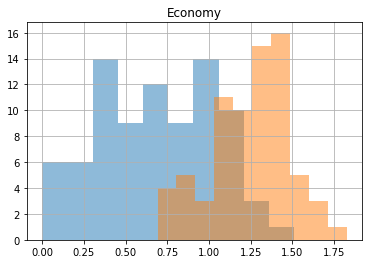

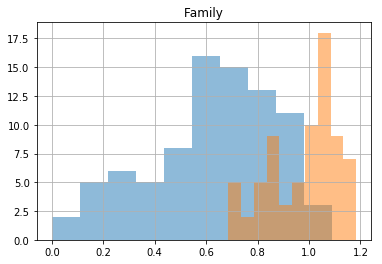

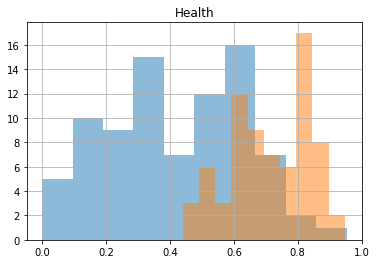

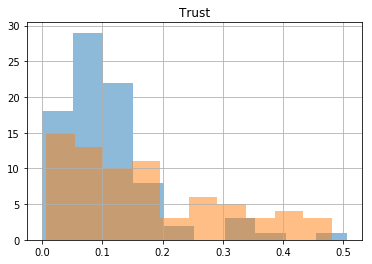

In [7]:
for column in numerical_columns:
    df.groupby('Happy')[column].hist(alpha=0.5)
    plt.title(column)
    plt.show()

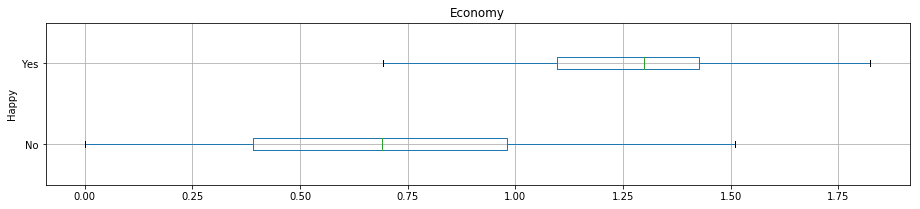

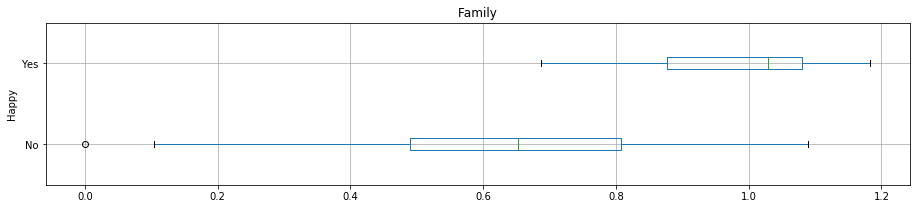

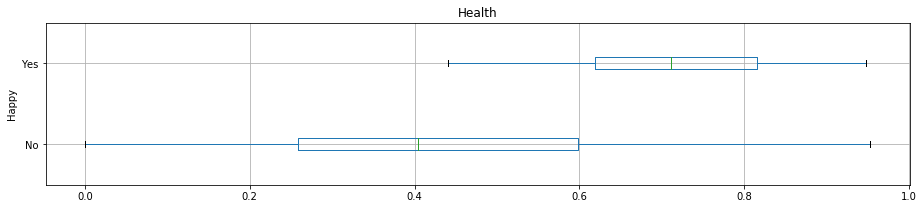

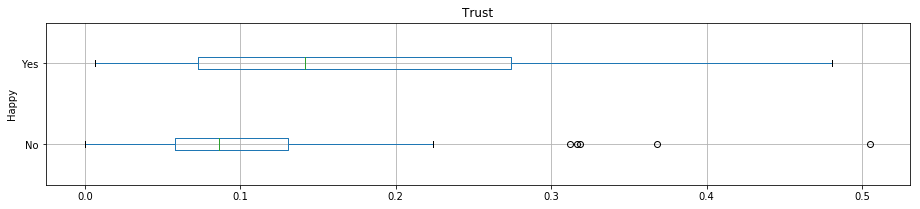

In [8]:
for column in numerical_columns:
    df.boxplot(column=[column], by='Happy', vert=False, figsize=(15,3))
    plt.suptitle('')
    plt.xlabel('')
    plt.ylabel('Happy')
    plt.show()

**2**

* 2. Logistic regression model:

* 2. a) Fit a logistic regression model with all predictor variables (response: `Happy`; predictors: `Economy`, `Family`, `Health` and `Trust`).  

* 2. b) Please explain wether you would recommend to exclude a predictor variable from your model (from task 2a)). Update your model if necessary.

* 2. c) Use your updated model and predict the probability that a country has "Happy" inhabitants. Classify a happy country as "happy"  (with label 'Yes') if the predicted probability of the happiness exceeds:

    - c1): 0.4 (i.e. threshold = 0.4) 
    - c2): 0.5 (i.e. threshold = 0.5)
    - c3): 0.7 (i.e. threshold = 0.7). 
    
    Otherwise classify the country as non-happy (with label 'No').


  * 2. d) Compute the confusion matrix for every threshold (c1), c2) and c3)) in order to determine how many observations were correctly or incorrectly classified. Furthermore, use the results from the confusion matrix and create the following variables: true positive; true negative; false positive and false negative. Use these variables to calculate the following measures: "Accuracy", Precision" (what proportion of positive identifications was actually correct?), "Recall" (what proportion of actual positives was identified correctly) and the F1 score (measure of a test's accuracy) for the thresholds in c1), c2) and c3). Which threshold would you recommend? 

Hints: **Precision** is defined as the number of true positives over the number of true positives plus the number of false positives. **Recall** is defined as the number of true positives over the number of true positives plus the number of false negatives. These two quantities are related to the **F1 score**, which is defined as the harmonic mean of precision and recall: $F1 = 2* ((Precision * Recall)/(Precision + Recall)).$

* 2. e) Fit the logistic regression model using a training data set. Compute the confusion matrix and accuracy for the held out data (test data size = 30%). Use a threshold of 0.7.


In [9]:
X = df[['Economy', 'Family', 'Health', 'Trust']].assign(Intercept=1)

In [10]:
# robert Series rausnehmen
y = np.where(df.Happy == 'Yes', 1.0, 0.0)

In [11]:
# ben
# y = df.apply(lambda x: 1.0 if x.Happy == 'Yes' else 0.0, axis=1).values

In [12]:
logreg = sm.Logit(y, X.values).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.284149
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:                          Logit   Df Residuals:                      152
Method:                           MLE   Df Model:                            4
Date:                Sun, 25 Nov 2018   Pseudo R-squ.:                  0.5886
Time:                        14:03:03   Log-Likelihood:                -44.611
converged:                       True   LL-Null:                       -108.44
                                        LLR p-value:                 1.236e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7402      1.435      1.910      0.056      -0.072       5.552
x2             8.0509      2.021      3.984      0.000       4.090      12.012
x3             3.8342      2.371      1.617      0.106      -0.812       8.480
x4             5.1377      3.726      1.379      0.168      -2.165      12.441
const        -12.5255      2.163     -5.791      0.000     -16.764      -8.286
==============================================================================
"""

x3 + x4 raus, da schlechter als 0.05 -> x1 knapp schlechter erstmal drin behalten

In [13]:
X.drop(['Health', 'Trust'], axis=1, inplace=True)
logreg = sm.Logit(y, X.values).fit()
logreg.summary()

Optimization terminated successfully.
         Current function value: 0.298113
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  157
Model:                          Logit   Df Residuals:                      154
Method:                           MLE   Df Model:                            2
Date:                Sun, 25 Nov 2018   Pseudo R-squ.:                  0.5684
Time:                        14:03:03   Log-Likelihood:                -46.804
converged:                       True   LL-Null:                       -108.44
                                        LLR p-value:                 1.708e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.3753      1.113      3.932      0.000       2.194       6.556
x2             8.0976      1.922      4.212      0.000       4.330      11.865
const        -11.4291      1.892     -6.042      0.000     -15.137      -7.722
==============================================================================
"""

x1 jetzt wichtiger für modell, aber schlechteres psedo r^2

In [14]:
df['Probability'] = logreg.predict(X)
df.head()

,Country,Economy,Family,Health,Trust,Happy,Probability
1,Denmark,1.44178,1.16374,0.79504,0.44453,Yes,0.986648
2,Switzerland,1.52733,1.14524,0.86303,0.41203,Yes,0.989304
3,Iceland,1.42666,1.18326,0.86733,0.14975,Yes,0.987806
4,Norway,1.57744,1.12690,0.79579,0.35776,Yes,0.990027
5,Finland,1.40598,1.13464,0.81091,0.41004,Yes,0.980360


In [15]:
# ben
# for threshold in [0.4, 0.5, 0.7]:
#     df['Happy_{}'.format(str(threshold)[-1])] = df.apply(lambda x: 'Yes' if x.Probability >= threshold else 'No', axis=1)

In [16]:
# robert
df['Threshold_04'] = np.where(df['Probability'] > 0.4, 'Yes', 'No')
df['Threshold_05'] = np.where(df['Probability'] > 0.5, 'Yes', 'No')
df['Threshold_07'] = np.where(df['Probability'] > 0.7, 'Yes', 'No')

In [17]:
df.head()

,Country,Economy,Family,Health,Trust,Happy,Probability,Threshold_04,Threshold_05,Threshold_07
1,Denmark,1.44178,1.16374,0.79504,0.44453,Yes,0.986648,Yes,Yes,Yes
2,Switzerland,1.52733,1.14524,0.86303,0.41203,Yes,0.989304,Yes,Yes,Yes
3,Iceland,1.42666,1.18326,0.86733,0.14975,Yes,0.987806,Yes,Yes,Yes
4,Norway,1.57744,1.12690,0.79579,0.35776,Yes,0.990027,Yes,Yes,Yes
5,Finland,1.40598,1.13464,0.81091,0.41004,Yes,0.980360,Yes,Yes,Yes


In [18]:
def print_metrics(df, predicted):
    # Header
    print('-'*50)
    print(f'Metrics for: {predicted}\n')
    
    # Confusion Matrix
    y_actu = pd.Series(df['Happy'], name='Actual')
    y_pred = pd.Series(df[predicted], name='Predicted')
    df_conf = pd.crosstab(y_actu, y_pred)
    display(df_conf)
    
    # Confusion Matrix to variables:
    pop = df_conf.values.sum()
    tp = df_conf['Yes']['Yes']
    tn = df_conf['No']['No']
    fp = df_conf['Yes']['No']
    fn = df_conf['No']['Yes']
    
    # Metrics
    accuracy = (tp + tn) / pop
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * ((precision * recall) / (precision + recall))
    print(f'Accuracy:  {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall:    {recall:.4f}')
    print(f'F1 Score:  {f1_score:.4f} \n')

In [19]:
# robert
print_metrics(df, 'Threshold_04')
print_metrics(df, 'Threshold_05')
print_metrics(df, 'Threshold_07')

# ben
# print_metrics(df, 'Happy_4')
# print_metrics(df, 'Happy_5')
# print_metrics(df, 'Happy_7')

--------------------------------------------------
Metrics for: Threshold_04



Predicted,No,Yes
Actual,,
No,67,17
Yes,9,64


Accuracy:  0.8344
Precision: 0.7901
Recall:    0.8767
F1 Score:  0.8312 

--------------------------------------------------
Metrics for: Threshold_05



Predicted,No,Yes
Actual,,
No,73,11
Yes,13,60


Accuracy:  0.8471
Precision: 0.8451
Recall:    0.8219
F1 Score:  0.8333 

--------------------------------------------------
Metrics for: Threshold_07



Predicted,No,Yes
Actual,,
No,78,6
Yes,16,57


Accuracy:  0.8599
Precision: 0.9048
Recall:    0.7808
F1 Score:  0.8382 



comment

e) Fit the logistic regression model using a training data set. Compute the confusion matrix and accuracy for the held out data (test data size = 30%). Use a threshold of 0.7.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.3, train_size=0.7)

In [21]:
logreg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.258026
         Iterations 8


In [26]:
# robert
prediction_results = pd.DataFrame({'Happy':np.where(y_test == 1, 'Yes', 'No'),'Probability':logreg.predict(X_test)})

# ben
# prediction_results = pd.DataFrame({'Happy':y_test.apply(lambda x: 'Yes' if x == 1 else 'No', axis=1),
#                                    'Probability':logreg.predict(X_test)})

In [27]:
# ben
# prediction_results['Predicted'] = prediction_results.apply(lambda x: 'Yes' if x.Probability >= 0.7 else 'No', axis=1)

In [28]:
# robert
prediction_results['Predicted'] = np.where(prediction_results['Probability'] > 0.7, 'Yes', 'No')

In [30]:
print_metrics(prediction_results, 'Predicted')

--------------------------------------------------
Metrics for: Predicted



Predicted,No,Yes
Actual,,
No,22,2
Yes,7,17


Accuracy:  0.8125
Precision: 0.8947
Recall:    0.7083
F1 Score:  0.7907 

